<h1 style="color: green; text-align: center"> Exploratory Data Analysis (EDA) & Data Cleaning </h1>
<hr width: 5px>
<h3>✍ written by : </h3>
<p><b>Maghouti</b> Aymane <br><b></b> Data engineering Student at the national school of applied sciences of alhociema <b>ENSAH</b></p>
<p style="text-align: right;"><b>23-December | <span style="color: red;">2023</span></b></p>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('final_data.csv',header=0)

In [41]:
df.head()

,Comments,Target
0,"It's sleek and fine, Good for the price \n",-1
1,Very good,-1
2,It's really a smart phone,-1
3,Nice phone,-1
4,"Nice gadget, seriously enjoying the phone",-1


In [42]:
print(df.columns)

Index(['Comments', 'Target'], dtype='object')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76539 entries, 0 to 76538
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  76539 non-null  object
 1   Target    76539 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [44]:
df.describe()

,Target
count,76539.000000
mean,0.455937
std,0.890018
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [45]:
df.isnull().sum()

Comments    0
Target      0
dtype: int64

## The distribution of classes

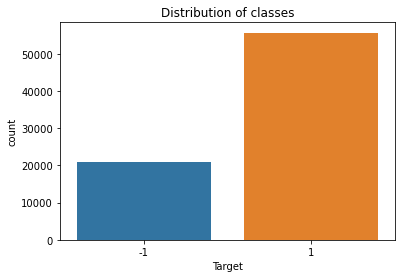

In [6]:
sns.countplot(x='Target', data=df)
plt.title('Distribution of classes')
plt.show()

## Comments length 

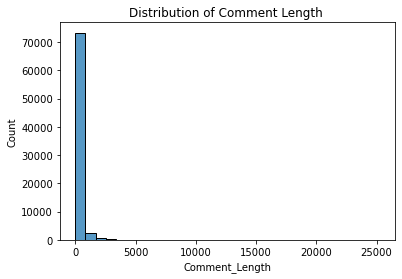

In [5]:
df['Comment_Length'] = df['Comments'].apply(len)
sns.histplot(df, x='Comment_Length', bins=30)                                                               
plt.title('Distribution of Comment Length ')
plt.show()

# 1. Boxplot of Comment Length by Target:

Show the distribution of comment lengths for each target class.

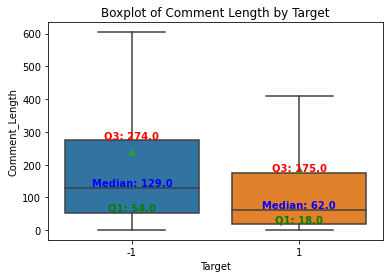

In [48]:
sns.boxplot(x='Target', y='Comment_Length', data=df, showfliers=False, showmeans=True)
plt.title('Boxplot of Comment Length by Target')

medians = df.groupby('Target')['Comment_Length'].median().values
q1s = df.groupby('Target')['Comment_Length'].quantile(0.25).values
q3s = df.groupby('Target')['Comment_Length'].quantile(0.75).values

for i in range(len(medians)):
    plt.text(i, medians[i], f'Median: {medians[i]}', ha='center', va='bottom', fontweight='bold', color='blue')
    plt.text(i, q1s[i], f'Q1: {q1s[i]}', ha='center', va='bottom', fontweight='bold', color='green')
    plt.text(i, q3s[i], f'Q3: {q3s[i]}', ha='center', va='bottom', fontweight='bold', color='red')

plt.show()

# 3. Bar Plot of Average Comment Length by Target:

Display the average comment length for each target class.

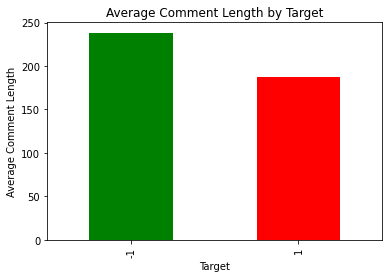

In [49]:
avg_length_by_target = df.groupby('Target')['Comment_Length'].mean()
avg_length_by_target.plot(kind='bar', color=['green', 'red'])
plt.title('Average Comment Length by Target')
plt.ylabel('Average Comment Length')
plt.show()

# 6. Word Frequency Bar Plot:

Display the frequency of the most common words in the comments.

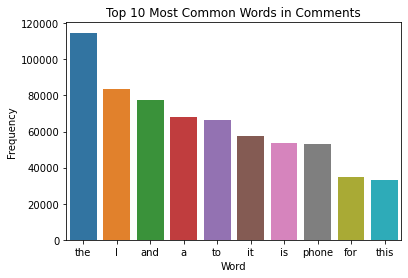

In [50]:
from collections import Counter
words = ' '.join(df['Comments']).split()
word_freq = Counter(words)

common_words = word_freq.most_common(10)  
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.title('Top 10 Most Common Words in Comments')
plt.show()

# Data  Cleaning

## 1.Remove stop words (the , a , et , de .....)

In [51]:
from nltk.corpus import stopwords

- Function to clean and remove stop words with english


In [52]:
def clean_text_eng(comment):
    stop_words = set(stopwords.words('english'))  
    words = comment.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)

In [53]:
df['Comments'] = df['Comments'].apply(clean_text_eng)

Display the frequency of the most common words in the comments after removing the stop words.

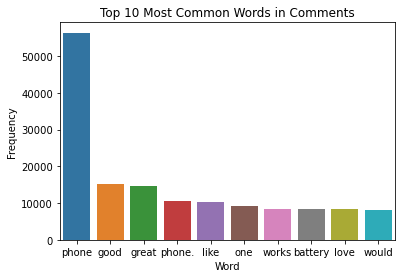

In [54]:
words = ' '.join(df['Comments']).split()
word_freq = Counter(words)

common_words = word_freq.most_common(10)  
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.title('Top 10 Most Common Words in Comments')
plt.show()

In [55]:
df.head()

,Comments,Target,Comment_Length
0,"sleek fine, good price",-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,"nice gadget, seriously enjoying phone",-1,41


# 1. Lowercasing:

Convert all text to lowercase to ensure consistency.

In [56]:
df['Comments'] = df['Comments'].str.lower()

In [57]:
df.head()

,Comments,Target,Comment_Length
0,"sleek fine, good price",-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,"nice gadget, seriously enjoying phone",-1,41


In [58]:
df = df.drop_duplicates(subset=['Comments'])

In [59]:
df.head()

,Comments,Target,Comment_Length
0,"sleek fine, good price",-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,"nice gadget, seriously enjoying phone",-1,41


In [60]:
df.shape

(50396, 3)

# 2. Removing Punctuation:

Remove punctuation from text.

In [61]:
import string
df['Comments'] = df['Comments'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [62]:
df.head()

,Comments,Target,Comment_Length
0,sleek fine good price,-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,nice gadget seriously enjoying phone,-1,41


# 3. Removing Numbers:

Remove numerical digits.

In [63]:
df['Comments'] = df['Comments'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

# 4. Removing Extra Whitespace:

Remove extra whitespaces.

In [64]:
df['Comments'] = df['Comments'].apply(lambda x: ' '.join(x.split()))

# 5. Lemmatization:

Reduce words to their base or root form.

In [65]:
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
                                                                                                                     
lemmatizer = WordNetLemmatizer()                                                                                                                                                                               
ds['Comments'] = ds['Comments'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [66]:
ds.head()

,Comments,Target,Comment_Length
0,service jumia,-1,25
1,thats bad surprise,-1,36
2,comfortable highly recommend,-1,39
3,perfect,-1,7
4,little,-1,58


# 6. Removing Rare Words:
Remove words that occur very infrequently.

In [67]:
word_frequency_threshold = 2  
word_counts = df['Comments'].str.split(expand=True).stack().value_counts()
rare_words = word_counts[word_counts <= word_frequency_threshold].index
df['Comments'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))

In [68]:
df.head()

,Comments,Target,Comment_Length
0,sleek fine good price,-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,nice gadget seriously enjoying phone,-1,41


# 7. expand contractions

- Converting shortened or contracted forms of words into their full, original forms. For example, converting "don't" to "do not" 

In [69]:
contractions_dict = {
    "it's": "it is",
    "i'm": "i am",
    "don't": "do not",
    "won't": "will not",
    "can't": "cannot",
    "I'll": "I will",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have",
    "didn't": "did not",
}



def expand_contractions(text, contractions_dict):
    words = text.split()
    expanded_text = [contractions_dict.get(word, word) for word in words]
    return ' '.join(expanded_text)


df['Comments'] = df['Comments'].apply(lambda x: expand_contractions(x, contractions_dict))

In [70]:
df.head()

,Comments,Target,Comment_Length
0,sleek fine good price,-1,41
1,good,-1,9
2,really smart phone,-1,25
3,nice phone,-1,10
4,nice gadget seriously enjoying phone,-1,41


# save the dataframe as csv file

In [72]:
df.to_csv('final_data.csv',index=False)